# Homwork 2
**Name:** Tommy Bojanin  - Bojanits


In [102]:
from __future__ import print_function, division

# Using this notebook
As a reminder, this is a Jupyter notebook, you cannot edit the version you see online in the `git` repo.
You must _use git_ to checkout the repo, and then use `jupyter notebook` to edit your local copy of this. You are encouraged to _fork_ my repo so you save and track your own changes. 

## Instructions
* You _may_ submit very neatly organized _**handwritten**_ math, or you may do the math in the cells of this notebook using $\LaTeX$. With $\LaTeX$, you may follow the example in this cell, or you can put `%%latex` at the top of any cell.  
* In the last problem set most submissions were clear and reasonablypresented, but I have my preferences for what I like to see from students. In particular, I am a big fan of the 3-column `align` environment, with the last column used as an explanation. In particular, this:
 $$ E(\mathbf{w}) 
   = \sum_{n=1}^N \{y(x_n |\mathbf{w}) - t_n\}^2
   = \sum_{n=1}^N \left\{\sum_{j=0}^M x_n^jw_j - t_n\right\}^2 \\
   \frac{\partial}{\partial w_i} E(\mathbf{w}) 
   = \sum_{n=1}^N \left\{\sum_{j=0}^M x_n^jw_j - t_n\right\}x_n^i 
   = \sum_{n=1}^N \sum_{j=0}^M x_n^jx_n^iw_j - \sum_{n=1}^N t_n x^i 
   = \sum_{j=0}^M \underbrace{\left\{\sum_{n=1}^N x_n^{j+i}\right\}}_{A_{ij}}w_j - \underbrace{\sum_{n=1}^N t_n x^i}_{T_i} $$

 is quite hard for me to follow, even if it is correct.  A **better** answer (for homework, not for formal papers) uses the `align` environment:

 > [Explaining the idea, that we want the gradient to be zero, etc]
 > $$ 
 \begin{align}
 E(\mathbf{w}) 
 &= \sum_{n=1}^N \{y(x_n |\mathbf{w}) - t_n\}^2  & \text{by dfn. (1.1) of PRML}  \\
 &= \sum_{n=1}^N \left\{\sum_{j=0}^M x_n^jw_j - t_n\right\}^2 & \text{subst. (1.2) into (1.1)} \hspace{1em}\\
 \end{align} 
 $$
 > [Explain that we want $\frac{\partial}{\partial w_i} E = 0, \forall i$]
 > $$ 
 \begin{align}
 \frac{\partial}{\partial w_i} E(\mathbf{w})  
 &= \sum_{n=1}^N \left\{\sum_{j=0}^M x_n^jw_j - t_n\right\}x_n^i   & \text{applying the chain rule [details..]}  \\ 
 &= \sum_{n=1}^N \sum_{j=0}^M x_n^jx_n^iw_j - \sum_{n=1}^N t_n x^i & \text{distributing $x_n^i$, and $\sum$.. 2 steps would be better} \\
 &= \sum_{j=0}^M \underbrace{\left\{\sum_{n=1}^N x_n^{j+i}\right\}}_{A_{ij}}w_j - \underbrace{\sum_{n=1}^N t_nx^i}_{T_i}  & \text{add terms in a different order, group $x^ix^j=x^{i+j}$} \\
 &=0 \implies \sum_{j=0}^M A_{ij}w_j = T_i \\
 \end{align} 
 $$
 >Q.E.D
 
 The key difference is that the latter one is:
  * A step-by-step process that proceeds from what is given, $E(\mathbf{w})$, to what we aim to show, $\sum_{j=0}^M A_{ij}w_j = T_i \implies \mathbf{w}=\mathbf{w}^*$.
  * The rationale behind each step is explained, in one of two ways;
    *  as a comment in the right margin letting me know why the step is valid
    *  or as plain-old-english (POE) explaining the intent of a set of steps, _before_ those steps are carried out. 
  
> **NOTE:** You may edit this cell to peak at the $\LaTeX$ I used to type out my answers. In its final form the $\LaTeX$ can seem intimidating, but most of it is copy-paste-modify for each step. 

## Problems

1\. _[4 pts]_ Do question 2.57 of PRML. 
* For practice, try to solve 2.56 first (do not submit your answers to that one).
* _ **2.57(\*)**  Verify that the multivariate gaussian distributions ca be cast in exponential family form (2.194) and derive expressions for $\boldsymbol{\eta}$, $\mathbf{u}(\mathbf{x})$, $h(\mathbf{x})$, and $g(\boldsymbol{\eta})$ analogous to (2.220)-(2.223)_

$\textbf{Did on paper, attached.}$


 2\. _[4 pts]_ Reproduce figure 2.8. 
 * Your Gaussian's do not have to be identical, but the covariance matrices should be 
     (a) general [not diagonal or isometric], 
     (b) diagonal, and 
     (c) proportional to the identity matrix. 

<a list of 3 text.Text objects>

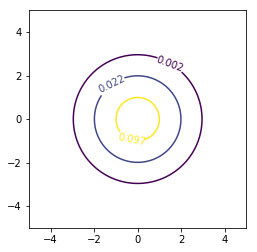

In [96]:
#Used your example from the lab, spent most of my time on problem 3 since it had data to use
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import linalg
import scipy
import scipy.stats as st



x_1, x_2 = mgrid[-3:3:100j, -3:3:100j]
y = zeros_like(x_1)

y.flat = [scipy.stats.multivariate_normal.pdf(x,cov=eye(2)) for x in zip(x_1.flat, x_2.flat)]

imshow(y, extent=(-5,5,-5,5), origin='lower', alpha=0.0)
clabel(contour(x_1, x_2, y, levels= [.5, 0.002, 0.022, 0.097]))


3\.  _[4 points]_ Reproduce figure 2.21. 
* The _old faithful_ data is describe in appendix A, you should be able to download it and open it.
* You can (and, for now, you should) use a function from `sklearn` in order to fit a mixture of Gaussians to your data. I beleive you can find what you need [here](http://scikit-learn.org/stable/modules/mixture.html)

**NOTE:** In order to help you out, I will get you started by downloading the data and plotting it

In [97]:
# Download the data
import urllib.request
import itertools
from sklearn import mixture
np.random.seed(127)

path = 'faithful.txt'
remote = urllib.request.urlopen('https://raw.githubusercontent.com/aidiary/PRML/master/ch9/faithful.txt')
with open('faithful.txt', 'wb') as f:
    f.write(remote.read())

In [98]:
# Read it in and inspect it
import pandas
from IPython.display import display
old_faithful = pandas.read_csv(path, sep=' ', names=['duration', 'next'])
display(old_faithful)

,duration,next
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0
5,2.883,55.0
6,4.700,88.0
7,3.600,85.0
8,1.950,51.0
9,4.350,85.0


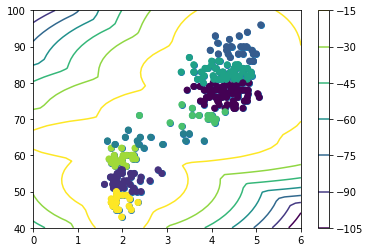

In [110]:
#used the sklearn "here" link
def plot_mix(mix):
    mask = mix.predict(data)
    xx = np.linspace(0, 6) 
    yy = np.linspace(40, 100) 
    X, Y = np.meshgrid(xx, yy)
    XX = np.c_[X.ravel(), Y.ravel()]
    Z =  mix.score_samples(XX)
    Z = Z.reshape(X.shape)

    CS = plt.contour(X, Y, Z)
    CB = plt.colorbar(CS)
    plt.scatter(old_faithful.duration, old_faithful.next, c=mask);

# Plot the data --> note that I convert from a DataFrame to an array 
data = np.array(old_faithful)
scatter(data[:,0], data[:,1])
#not sure what to put for covariance type, so i just used what looked "prettiest"
gaussian_fit = mixture.GaussianMixture(n_components=8, covariance_type="diag")
gaussian_fit.fit(data)

plot_mix(gaussian_fit)

